In [7]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from lista import LISTA, make_loss
from functions import *
from scipy.linalg import hadamard
from copy import deepcopy

In [10]:
n_samples = 1000
n_test = 100
k = 10
p = 8
rng = np.random.RandomState(0)

fit_loss = 'l2'
reg = None

fit_function, der_function = {
                              'l2': (l2_fit, l2_der),
                              'logreg': (logreg_fit, logreg_der)
                              }[fit_loss]
reg_function, prox = {
                      'l2': (l2_pen, l2_prox),
                      'l1': (l1_pen, l1_prox),
                      None: (no_pen, no_prox)
                      }[reg]
loss = make_loss(fit_function, reg_function)


H = hadamard(p) / np.sqrt(p)
#S = p / np.arange(1, p + 1)
#S **= 2
S = np.ones(p)
K = np.dot(H, S[:, None] * H.T)

z_true = rng.randn(p, n_samples)
D = rng.randn(k, p).dot(K)
D /= np.linalg.norm(D, axis=0, keepdims=True)

sigma = 0.1
eps = rng.randn(k, n_samples)

z_test = rng.randn(p, n_test)
eps_test = rng.randn(k, n_test)
X = np.dot(D, z_true) + eps
X_test = np.dot(D, z_test) + eps_test
if fit_loss == 'logreg':
    X = 2 * (X > 0) - 1
    X_test = 2 * (X_test > 0) - 1
    
lbda_max = np.max(np.abs(D.T.dot(X)))
lbda = 0.1 * lbda_max
print(X.shape)

(10, 1000)


In [11]:
n_layers = 1000
ista_min = LISTA(D, lbda, n_layers, fit_loss, reg, variables='both', learn_levels=True, architecture='sag')
L = np.linalg.norm(D, ord=2) ** 2 * 10
# ista_min.levels = [lbda / L, ] *  n_layers 
f_min = ista_min.compute_loss(X_test)
z_hat = ista_min.transform(X_test)
L = np.linalg.norm(D, ord=2) ** 2
print(np.linalg.norm(z_hat - prox(z_hat - np.dot(D.T / L, der_function(np.dot(D, z_hat), X_test)), lbda / L)))
print(f_min)

2.396649683850672e-14
0.9653978125237501


In [15]:
loss_untrained = []
loss_trained = []
layers = [1, 3, 10]
l_rates = [1e-3, 1e-4, 1e-5]
for j, (l_rate, n_layers) in enumerate(zip(l_rates, layers)):
    lista = LISTA(D, lbda, n_layers, fit_loss, reg, variables='both', learn_levels=True, architecture='sag')
    loss_untrained.append(lista.compute_loss(X_test))
    if j > 0:
        lista.weights[:len(old_weights)] = old_weights
        lista.levels[:len(old_levels)] = old_levels
    lista.fit(X, l_rate=l_rate, max_iter=1000, verbose=True)
    old_weights = deepcopy(lista.weights)
    old_levels = deepcopy(lista.levels)
    loss_trained.append(lista.compute_loss(X_test))

it 0, loss = 4.409e+00, grad_W = 4.12e+00, grad_l = 0.00e+00
it 100, loss = 4.011e+00, grad_W = 3.57e+00, grad_l = 0.00e+00
it 200, loss = 3.734e+00, grad_W = 3.28e+00, grad_l = 0.00e+00
it 300, loss = 3.527e+00, grad_W = 3.13e+00, grad_l = 0.00e+00
it 400, loss = 3.367e+00, grad_W = 3.09e+00, grad_l = 0.00e+00
it 500, loss = 3.242e+00, grad_W = 3.15e+00, grad_l = 0.00e+00
it 600, loss = 3.145e+00, grad_W = 3.36e+00, grad_l = 0.00e+00
it 700, loss = 3.074e+00, grad_W = 3.80e+00, grad_l = 0.00e+00
it 800, loss = 3.037e+00, grad_W = 4.71e+00, grad_l = 0.00e+00


/home/pierre/work/adopty/adopty/autograd/lista.py:78: UserWarning: loss increasing
  residual = der_function(np.dot(W2, z), x)


it 900, loss = 3.077e+00, grad_W = 7.14e+00, grad_l = 0.00e+00
it 0, loss = 5.872e+00, grad_W = 7.91e+01, grad_l = 0.00e+00
it 100, loss = 2.619e+00, grad_W = 2.46e+01, grad_l = 0.00e+00
it 200, loss = 2.091e+00, grad_W = 1.20e+01, grad_l = 0.00e+00
it 300, loss = 1.910e+00, grad_W = 7.80e+00, grad_l = 0.00e+00
it 400, loss = 1.814e+00, grad_W = 6.00e+00, grad_l = 0.00e+00
it 500, loss = 1.752e+00, grad_W = 5.02e+00, grad_l = 0.00e+00
it 600, loss = 1.709e+00, grad_W = 4.40e+00, grad_l = 0.00e+00
it 700, loss = 1.677e+00, grad_W = 3.97e+00, grad_l = 0.00e+00
it 800, loss = 1.653e+00, grad_W = 3.67e+00, grad_l = 0.00e+00
it 900, loss = 1.633e+00, grad_W = 3.45e+00, grad_l = 0.00e+00
it 0, loss = 1.239e+00, grad_W = 5.26e+00, grad_l = 0.00e+00
it 100, loss = 1.237e+00, grad_W = 5.21e+00, grad_l = 0.00e+00
it 200, loss = 1.235e+00, grad_W = 5.17e+00, grad_l = 0.00e+00
it 300, loss = 1.233e+00, grad_W = 5.12e+00, grad_l = 0.00e+00
it 400, loss = 1.231e+00, grad_W = 5.08e+00, grad_l = 0.00e

Text(0, 0.5, 'Loss on test data')

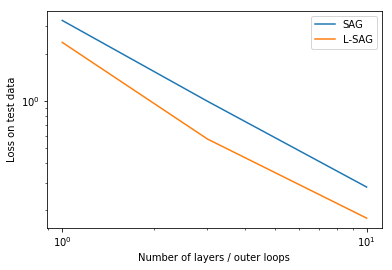

In [16]:
plt.plot(layers, loss_untrained - f_min, label='SAG')
plt.plot(layers, loss_trained - f_min, label='L-SAG')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of layers / outer loops')
plt.ylabel('Loss on test data')